In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [2]:
df = pd.read_csv('cardio_train.csv', delimiter = ';')

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
df.isnull().values.any()

False

# Outliers

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.drop(df[(df['height'] > df['height'].quantile(0.975))|(df['height'] < df['height'].quantile(0.025)) ].index, inplace = True)

In [8]:
df.drop(df[(df['weight'] > df['weight'].quantile(0.975))|(df['weight'] < df['weight'].quantile(0.025)) ].index, inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63866 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           63866 non-null  int64  
 1   age          63866 non-null  int64  
 2   gender       63866 non-null  int64  
 3   height       63866 non-null  int64  
 4   weight       63866 non-null  float64
 5   ap_hi        63866 non-null  int64  
 6   ap_lo        63866 non-null  int64  
 7   cholesterol  63866 non-null  int64  
 8   gluc         63866 non-null  int64  
 9   smoke        63866 non-null  int64  
 10  alco         63866 non-null  int64  
 11  active       63866 non-null  int64  
 12  cardio       63866 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.8 MB


In [10]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [11]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


In [12]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975))|(df['ap_hi'] < df['ap_hi'].quantile(0.025)) ].index, inplace = True)

In [13]:
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975))|(df['ap_lo'] < df['ap_lo'].quantile(0.025)) ].index, inplace = True)

In [14]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 0 cases


In [15]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,49895.698065,19468.719979,1.347311,164.554854,73.426805,125.770526,81.046307,1.350953,1.220229,0.085631,0.051877,0.803648,0.488228
std,28840.467755,2460.510296,0.476120,6.830174,11.614806,13.761847,8.239157,0.670076,0.567607,0.279820,0.221781,0.397241,0.499866
min,0.000000,10798.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24867.500000,17677.250000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,49902.500000,19705.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74745.750000,21321.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,180.000000,106.000000,163.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# Data has been cleaned

# Feature Eng

In [17]:
df['age_years'] = (df['age']/365).round().astype('int')

In [18]:
df.drop(['age'], axis='columns', inplace=True)
df.drop(['id'], axis='columns', inplace=True)

In [19]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,156,85.0,140,90,3,1,0,0,1,1,55
2,1,165,64.0,130,70,3,1,0,0,0,1,52
3,2,169,82.0,150,100,1,1,0,0,1,1,48
4,1,156,56.0,100,60,1,1,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54
69994,1,165,80.0,150,80,1,1,0,0,1,1,58
69995,2,168,76.0,120,80,1,1,1,0,1,0,53
69998,1,163,72.0,135,80,1,2,0,0,0,1,61


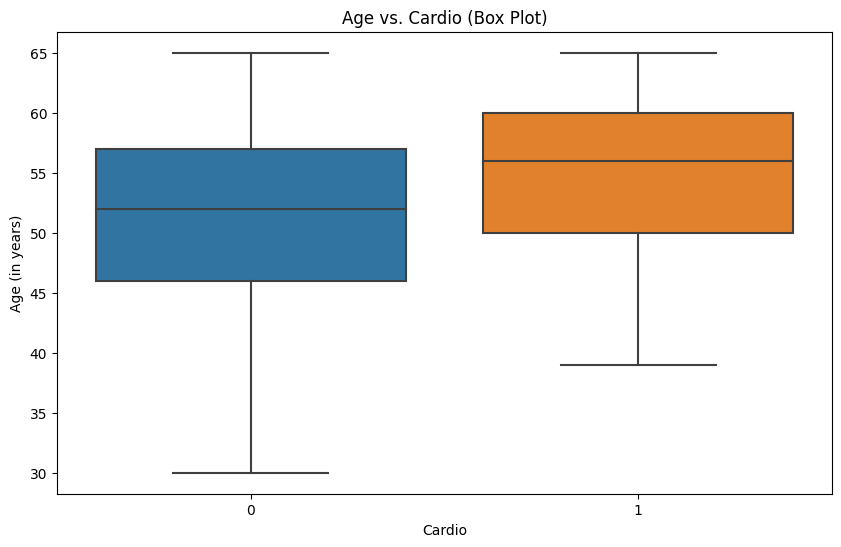

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cardio', y='age_years', data=df)
plt.title('Age vs. Cardio (Box Plot)')
plt.xlabel('Cardio')
plt.ylabel('Age (in years)')
plt.show()

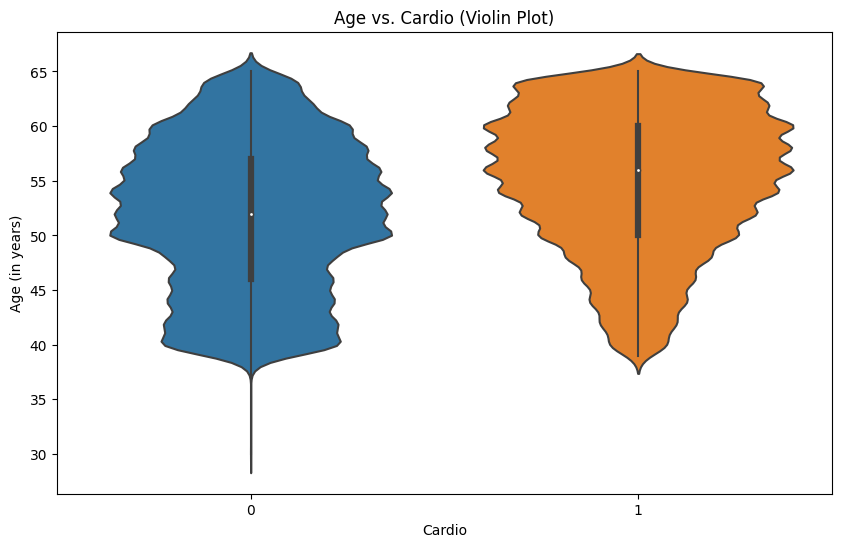

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='cardio', y='age_years', data=df)
plt.title('Age vs. Cardio (Violin Plot)')
plt.xlabel('Cardio')
plt.ylabel('Age (in years)')
plt.show()

In [22]:
bin_range = [0,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

bin_labels = [f'{bin_start}-{bin_end}'for bin_start, bin_end in zip(bin_range[:-1],bin_range[1:])]

df['age_bin'] = pd.cut(df['age_years'], bins = bin_range, labels = bin_labels)

In [23]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_bin
0,2,168,62.0,110,80,1,1,0,0,1,0,50,45-50
1,1,156,85.0,140,90,3,1,0,0,1,1,55,50-55
2,1,165,64.0,130,70,3,1,0,0,0,1,52,50-55
3,2,169,82.0,150,100,1,1,0,0,1,1,48,45-50
4,1,156,56.0,100,60,1,1,0,0,0,0,48,45-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,50-55
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,55-60
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,50-55
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,60-65


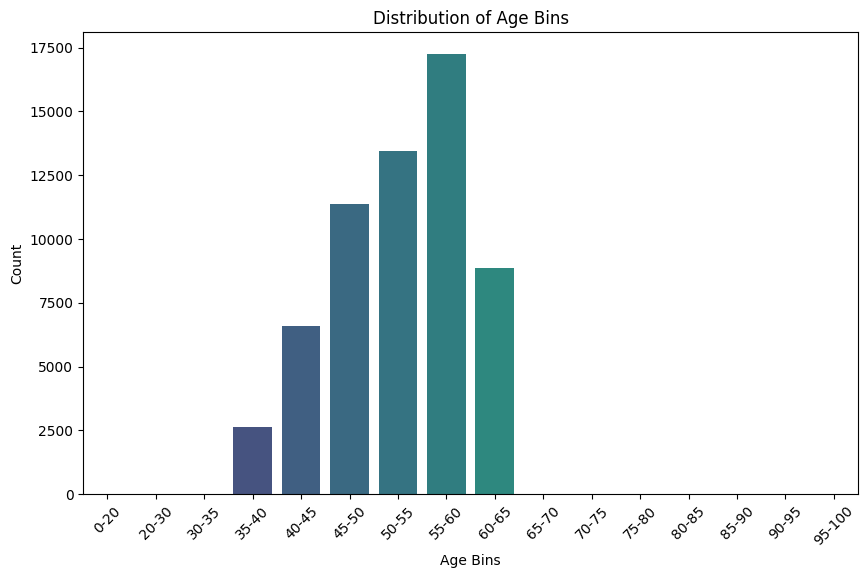

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='age_bin', data=df, palette='viridis') 
plt.title('Distribution of Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [25]:
df['bmi'] = df['weight']/ ((df['height']/100)**2)

In [26]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_bin,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50,45-50,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55,50-55,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,52,50-55,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48,45-50,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,48,45-50,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,50-55,23.661439
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,55-60,29.384757
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,50-55,26.927438
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,60-65,27.099251


In [27]:
bmi_thresholds = [0,18.5,24.9,34.9,49.9, np.inf]

bmi_labels = ['UnderWeight', 'NormalWeight', 'OverWeight', 'ClassObesity_1','ClassObesity_2','ClassObesity_3']

In [28]:
df['bmi_class'] = np.digitize(df['bmi'], bins=bmi_thresholds, right=True)


In [29]:
df['bmi_class'] = df['bmi_class'].map(lambda x: bmi_labels[x-1] if 1 <= x <= 6 else 'Error')

In [30]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_bin,bmi,bmi_class
0,2,168,62.0,110,80,1,1,0,0,1,0,50,45-50,21.967120,NormalWeight
1,1,156,85.0,140,90,3,1,0,0,1,1,55,50-55,34.927679,ClassObesity_1
2,1,165,64.0,130,70,3,1,0,0,0,1,52,50-55,23.507805,NormalWeight
3,2,169,82.0,150,100,1,1,0,0,1,1,48,45-50,28.710479,OverWeight
4,1,156,56.0,100,60,1,1,0,0,0,0,48,45-50,23.011177,NormalWeight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,50-55,23.661439,NormalWeight
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,55-60,29.384757,OverWeight
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,50-55,26.927438,OverWeight
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,60-65,27.099251,OverWeight


In [31]:
df['bmi_class'] .value_counts(normalize = True)

OverWeight        0.570982
NormalWeight      0.361943
ClassObesity_1    0.064963
UnderWeight       0.002112
Name: bmi_class, dtype: float64

In [32]:
rating = []
for row in df['bmi']:
    if row < 18.5 :    rating.append(1) #UnderWeight
    elif row > 18.5 and row  < 24.9:   rating.append(2)#NormalWeight
    elif row > 24.9 and row < 29.9:  rating.append(3)#OverWeight
    elif row > 29.9 and row < 34.9:  rating.append(4)#ClassObesity_1
    elif row > 34.9 and row < 39.9:  rating.append(5)#ClassObesity_2
    elif row > 39.9 and row < 49.9:  rating.append(6)#ClassObesity_3
    elif row > 49.9:  rating.append('Error')
        
    else:           rating.append('Not_Rated')

In [33]:
df['BMI_Class'] = rating

In [34]:
df["BMI_Class"].value_counts(normalize=True)

3    0.391773
2    0.361943
4    0.179209
5    0.055801
6    0.009162
1    0.002112
Name: BMI_Class, dtype: float64

In [35]:
df.drop(columns = ['bmi_class'], axis = 1, inplace = True)

In [36]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_bin,bmi,BMI_Class
0,2,168,62.0,110,80,1,1,0,0,1,0,50,45-50,21.967120,2
1,1,156,85.0,140,90,3,1,0,0,1,1,55,50-55,34.927679,5
2,1,165,64.0,130,70,3,1,0,0,0,1,52,50-55,23.507805,2
3,2,169,82.0,150,100,1,1,0,0,1,1,48,45-50,28.710479,3
4,1,156,56.0,100,60,1,1,0,0,0,0,48,45-50,23.011177,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,50-55,23.661439,2
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,55-60,29.384757,3
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,50-55,26.927438,3
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,60-65,27.099251,3


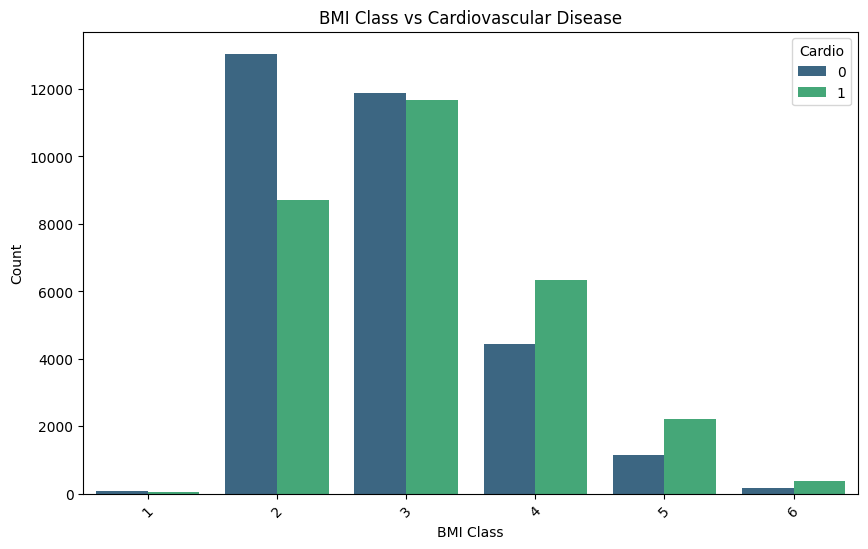

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI_Class', hue='cardio', data=df, palette='viridis')
plt.title('BMI Class vs Cardiovascular Disease')
plt.xlabel('BMI Class')
plt.ylabel('Count')
plt.legend(title='Cardio', loc='upper right')
plt.xticks(rotation=45)
plt.show()


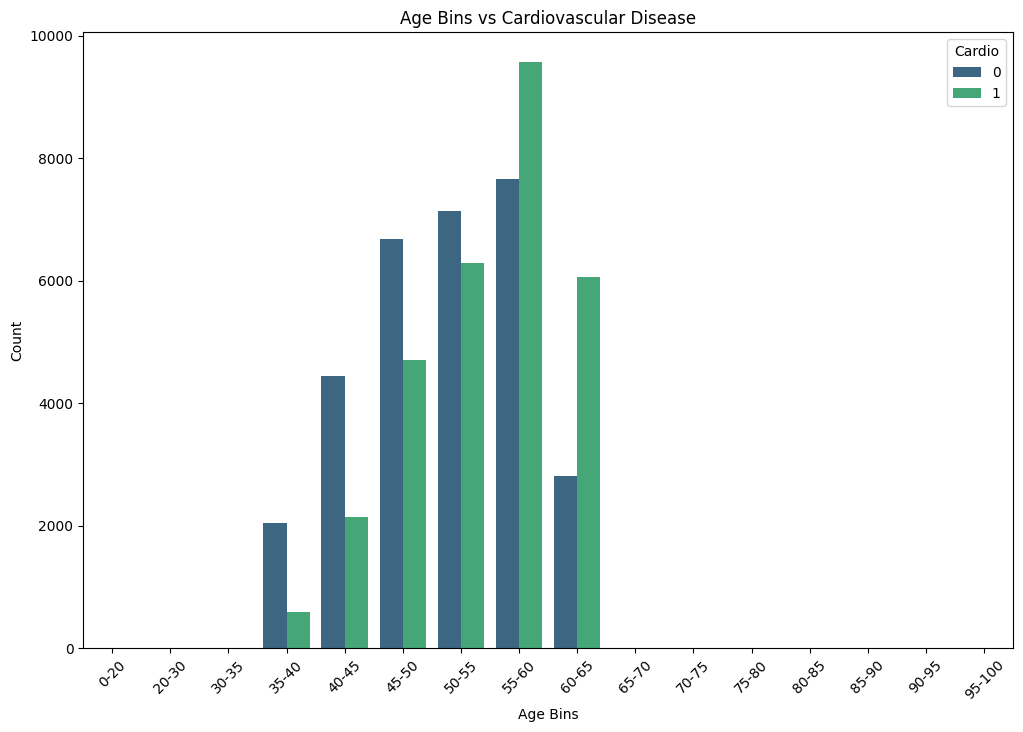

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
plt.figure(figsize=(12, 8))
sns.countplot(x='age_bin', hue='cardio', data=df, palette='viridis')
plt.title('Age Bins vs Cardiovascular Disease')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.legend(title='Cardio', loc='upper right')
plt.xticks(rotation=45)
plt.show()


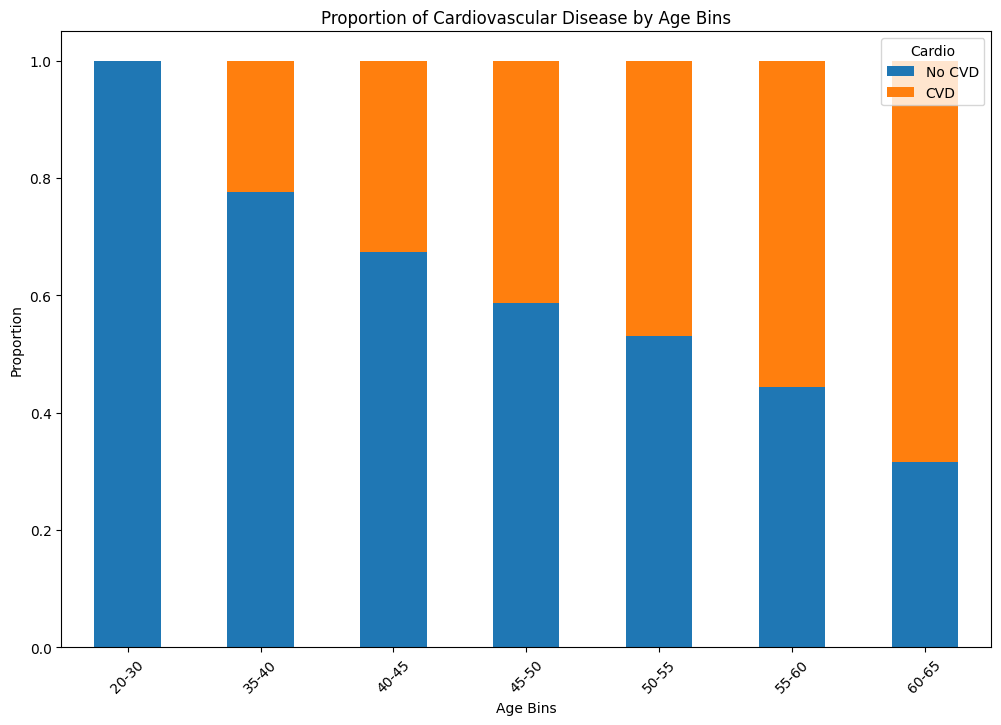

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'
# Create a cross-tabulation of age bins and cardio
age_bin_cvd = pd.crosstab(df['age_bin'], df['cardio'])

# Normalize the cross-tab to sum to 1 for each age bin
age_bin_cvd = age_bin_cvd.div(age_bin_cvd.sum(1), axis=0)

# Plot
age_bin_cvd.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(12, 8))
plt.title('Proportion of Cardiovascular Disease by Age Bins')
plt.xlabel('Age Bins')
plt.ylabel('Proportion')
plt.legend(title='Cardio', labels=['No CVD', 'CVD'], loc='upper right')
plt.xticks(rotation=45)
plt.show()


In [37]:
df['MAP'] = ((2*df['ap_lo']) + df['ap_hi'])/3

In [38]:
map_values = []
for row in df['MAP']:
    if row < 69.9:    map_values.append(1) #Low
    elif row > 70 and row  < 79.9:   map_values.append(2)#Normal
    elif row > 79.9 and row < 89.9:  map_values.append(3)#Normal
    elif row > 89.9 and row < 99.9:  map_values.append(4)#Normal
    elif row > 99.9 and row < 109.9:  map_values.append(5)#High
    elif row > 109.9 and row < 119.9:  map_values.append(6)#Normal
    elif row > 119.9:  map_values.append(7)
        
    else:           map_values.append('Not_Rated')

In [39]:
df['MAP_Class'] = map_values

In [40]:
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_bin,bmi,BMI_Class,MAP,MAP_Class
0,2,168,62.0,110,80,1,1,0,0,1,0,50,45-50,21.967120,2,90.000000,4
1,1,156,85.0,140,90,3,1,0,0,1,1,55,50-55,34.927679,5,106.666667,5
2,1,165,64.0,130,70,3,1,0,0,0,1,52,50-55,23.507805,2,90.000000,4
3,2,169,82.0,150,100,1,1,0,0,1,1,48,45-50,28.710479,3,116.666667,6
4,1,156,56.0,100,60,1,1,0,0,0,0,48,45-50,23.011177,2,73.333333,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,1,172,70.0,130,90,1,1,0,0,1,1,54,50-55,23.661439,2,103.333333,5
69994,1,165,80.0,150,80,1,1,0,0,1,1,58,55-60,29.384757,3,103.333333,5
69995,2,168,76.0,120,80,1,1,1,0,1,0,53,50-55,26.927438,3,93.333333,4
69998,1,163,72.0,135,80,1,2,0,0,0,1,61,60-65,27.099251,3,98.333333,4


In [41]:
df= df[["gender","height","weight","bmi","ap_hi","ap_lo","MAP","age_years","age_bin","BMI_Class","MAP_Class","cholesterol","gluc","smoke","active","cardio"]]
df.head()

,gender,height,weight,bmi,ap_hi,ap_lo,MAP,age_years,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,2,168,62.0,21.967120,110,80,90.000000,50,45-50,2,4,1,1,0,1,0
1,1,156,85.0,34.927679,140,90,106.666667,55,50-55,5,5,3,1,0,1,1
2,1,165,64.0,23.507805,130,70,90.000000,52,50-55,2,4,3,1,0,0,1
3,2,169,82.0,28.710479,150,100,116.666667,48,45-50,3,6,1,1,0,1,1
4,1,156,56.0,23.011177,100,60,73.333333,48,45-50,2,2,1,1,0,0,0


# Perparation

In [42]:
df_cat =df[[
    'gender', 'age_bin','BMI_Class','MAP_Class','cholesterol','gluc','smoke','active','cardio'
]]

In [43]:
from sklearn import preprocessing

In [44]:
le = preprocessing.LabelEncoder()
df_cat = df_cat.apply(le.fit_transform)


In [45]:
df_cat

,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,1,3,1,2,0,0,0,1,0
1,0,4,4,3,2,0,0,1,1
2,0,4,1,2,2,0,0,0,1
3,1,3,2,4,0,0,0,1,1
4,0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
69993,0,4,1,3,0,0,0,1,1
69994,0,5,2,3,0,0,0,1,1
69995,1,4,2,2,0,0,1,1,0
69998,0,6,2,2,0,1,0,0,1


In [46]:
df_male = df_cat.query("gender == 0")
df_female = df_cat.query("gender == 1")

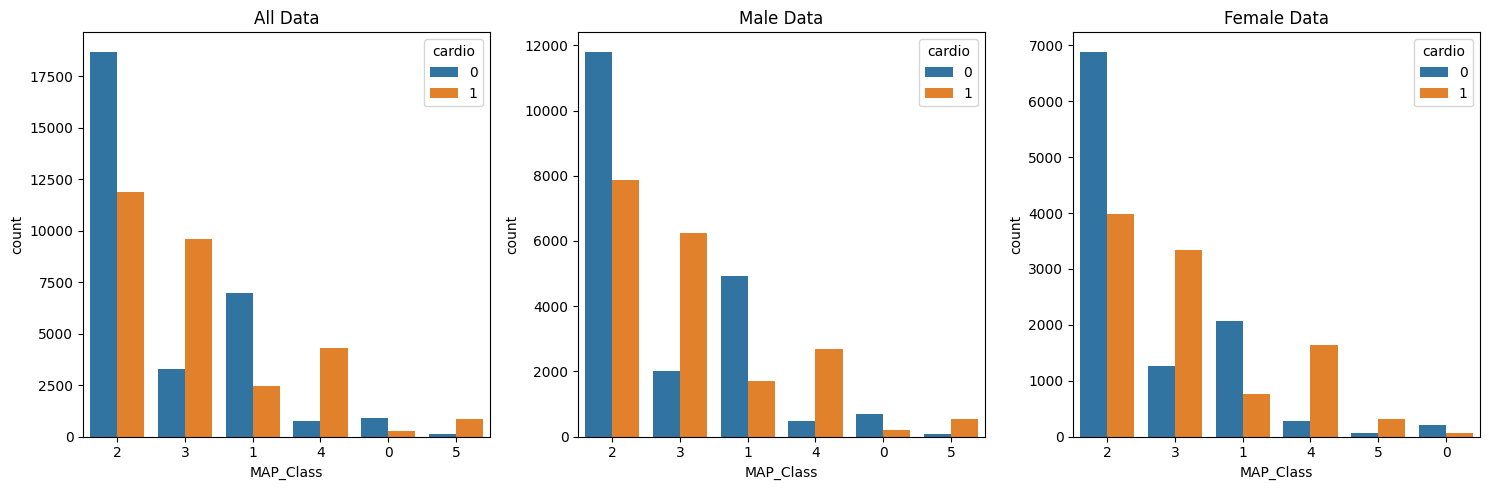

In [47]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['MAP_Class'],order=df_cat['MAP_Class'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['MAP_Class'],order=df_male['MAP_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['MAP_Class'],order=df_female['MAP_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

In [48]:
# Data balanced 

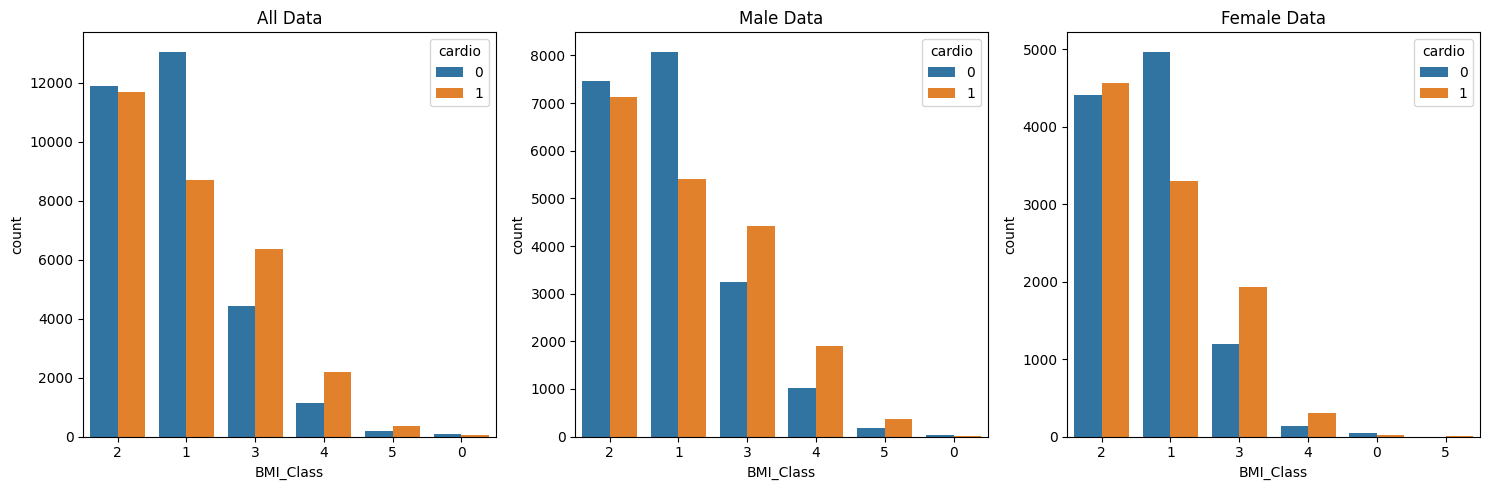

In [49]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=df_cat['BMI_Class'],order=df_cat['BMI_Class'].value_counts().index,hue=df_cat['cardio'],ax=axs[0])
sns.countplot(x=df_male['BMI_Class'],order=df_male['BMI_Class'].value_counts().index,hue=df_male['cardio'],ax=axs[1])
sns.countplot(x=df_female['BMI_Class'],order=df_female['BMI_Class'].value_counts().index,hue=df_female['cardio'],ax=axs[2])

axs[0].set_title('All Data')
axs[1].set_title('Male Data')
axs[2].set_title('Female Data')
plt.tight_layout()
plt.show()

# D-Tree

In [50]:
data = pd.concat([df[['height','weight','bmi','ap_hi','ap_lo','MAP','age_years']],df_cat], axis = 1) 
data

,height,weight,bmi,ap_hi,ap_lo,MAP,age_years,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,168,62.0,21.967120,110,80,90.000000,50,1,3,1,2,0,0,0,1,0
1,156,85.0,34.927679,140,90,106.666667,55,0,4,4,3,2,0,0,1,1
2,165,64.0,23.507805,130,70,90.000000,52,0,4,1,2,2,0,0,0,1
3,169,82.0,28.710479,150,100,116.666667,48,1,3,2,4,0,0,0,1,1
4,156,56.0,23.011177,100,60,73.333333,48,0,3,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,172,70.0,23.661439,130,90,103.333333,54,0,4,1,3,0,0,0,1,1
69994,165,80.0,29.384757,150,80,103.333333,58,0,5,2,3,0,0,0,1,1
69995,168,76.0,26.927438,120,80,93.333333,53,1,4,2,2,0,0,1,1,0
69998,163,72.0,27.099251,135,80,98.333333,61,0,6,2,2,0,1,0,0,1


In [51]:
X = data.drop(columns = ['cardio'])
y = data['cardio']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=1)
DT_clf = DecisionTreeClassifier(max_depth=3)
DT_clf.fit(X_train,y_train)
y_pred = DT_clf.predict(X_test)
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.7161780191764119


In [52]:
X = data.drop(columns=['cardio'])
y = data['cardio']
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.35,random_state=1)

RF_clf = RandomForestClassifier(n_estimators=50,max_depth=9)
RF_clf.fit(X_train,y_train)
y_pred = RF_clf.predict(X_test)
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7239429928741092


In [53]:
logm = LogisticRegression()
logm.fit(X_train, y_train)
logm.score(X_train, y_train)
logm.score(X_test, y_test)

C:\Users\neshri\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.718812351543943

In [54]:
#pip install kmodes

In [55]:
# K Models
from kmodes.kmodes import KModes

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [56]:
df_male = df_cat.query("gender == 0")
df_female = df_cat.query("gender == 1")

In [55]:
# cost = []

# k = range(1,6)
# for i in list(k):
#     kmodel = KModes(n_clusters = i, init = 'Huang', n_init = 5, verbose = 0)
#     kmodel.fit_predict(df_cat)
#     cost.append(kmodel.cost_)

In [56]:
# plt.plot(K, cost, 'bx-')
# plt.xlabel('No. of clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [57]:
# cost = []

# k = range(1,6)
# for i in list(k):
#     kmodel = KModes(n_clusters = i, init = 'Huang', n_init = 5, verbose = 0)
#     kmodel.fit_predict(df_male)
#     cost.append(kmodel.cost_)

# plt.plot(K, cost, 'bx-')
# plt.xlabel('No. of clusters')
# plt.ylabel('Cost')
# plt.title('Elbow Method For Optimal k')
# plt.show()

In [58]:
# import multiprocessing

# def find_optimal_k(num_clusters):
#     kmode = KModes(n_clusters=num_clusters, init="Huang", n_init=5, verbose=0)
#     kmode.fit_predict(df_female)
#     return num_clusters, kmode.cost_

# if __name__ == "__main__":
#     pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())  # Use all available CPU cores
    
#     K = range(1, 6)  # Adjust the range as needed
#     results = pool.map(find_optimal_k, K)
    
#     pool.close()
#     pool.join()
    
#     K, cost = zip(*results)

#     plt.plot(K, cost, 'bx-')
#     plt.xlabel('No. of clusters')
#     plt.ylabel('Cost')
#     plt.title('Elbow Method For Optimal k')
#     plt.show()

In [57]:
km_huang = KModes(n_clusters=3, init = "Huang", n_init = 5, verbose=0)
female_clusters = km_huang.fit_predict(df_female)


In [58]:
import pickle
with open('female_clusters.pkl', 'wb') as file:
    pickle.dump(female_clusters, file)

In [59]:
km_huang_2 = KModes(n_clusters=3, init = "Huang", n_init = 5, verbose=0)
male_clusters = km_huang_2.fit_predict(df_male)


In [60]:
with open('male_clusters.pkl', 'wb') as file:
    pickle.dump(male_clusters, file)

In [63]:
df_female.insert(0,'Cluster', female_clusters, True)
df_female

,Cluster,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,0,0,1,3,1,2,0,0,0,1,0
3,2,2,1,3,2,4,0,0,0,1,1
7,2,2,1,6,3,3,2,2,0,1,1
11,0,0,1,4,1,2,0,0,0,1,0
12,0,0,1,2,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69973,0,0,1,6,1,2,0,0,0,1,0
69980,0,0,1,3,1,2,0,0,0,0,0
69984,2,2,1,3,2,2,0,0,0,1,1
69986,0,0,1,3,1,2,0,0,0,1,0


In [64]:
df_male.insert(0,'Cluster', male_clusters, True)
df_male

,Cluster,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
1,1,1,0,4,4,3,2,0,0,1,1
2,0,0,0,4,1,2,2,0,0,0,1
4,0,0,0,3,1,0,0,0,0,0,0
5,0,0,0,5,2,2,1,1,0,0,0
6,0,0,0,6,4,2,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
69991,1,1,0,5,2,3,1,1,0,1,0
69993,1,1,0,4,1,3,0,0,0,1,1
69994,1,1,0,5,2,3,0,0,0,1,1
69998,1,1,0,6,2,2,0,1,0,0,1


In [65]:
df_clusters = pd.concat([df_female, df_male], ignore_index = True, sort = False)

In [66]:
df_clusters

,Cluster,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
0,0,0,1,3,1,2,0,0,0,1,0
1,2,2,1,3,2,4,0,0,0,1,1
2,2,2,1,6,3,3,2,2,0,1,1
3,0,0,1,4,1,2,0,0,0,1,0
4,0,0,1,2,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
60137,1,1,0,5,2,3,1,1,0,1,0
60138,1,1,0,4,1,3,0,0,0,1,1
60139,1,1,0,5,2,3,0,0,0,1,1
60140,1,1,0,6,2,2,0,1,0,0,1


C:\Users\neshri\AppData\Local\Temp\ipykernel_35664\1404098041.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


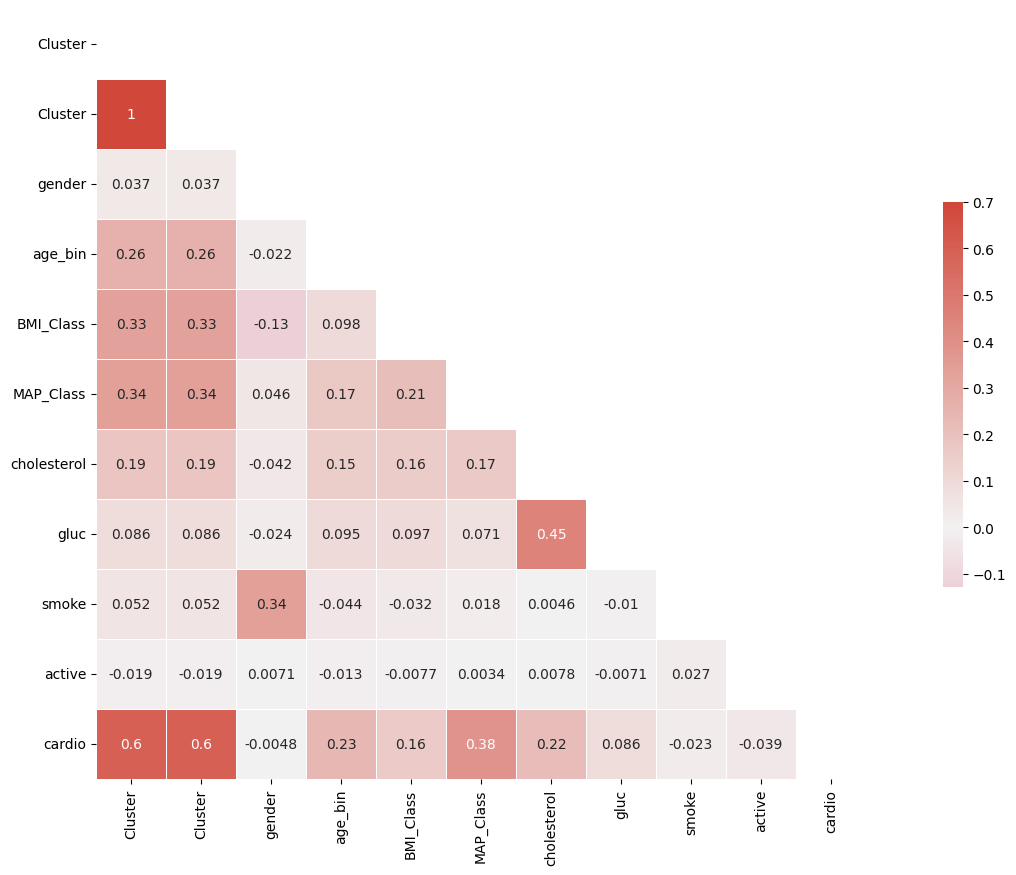

In [67]:
corr = df_clusters.corr()
cmap = sns.diverging_palette(2, 15, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# Analysis 

In [68]:
# Left

# ML Modeling

In [69]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import pandas_profiling as pp

from sklearn.naive_bayes import GaussianNB

C:\Users\neshri\AppData\Local\Temp\ipykernel_35664\2769478919.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [70]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_ml = df_clusters.apply(le.fit_transform)
df_ml.describe()


,Cluster,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active,cardio
count,60142.000000,60142.000000,60142.000000,60142.000000,60142.00000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000,60142.000000
mean,0.671195,0.671195,0.347311,4.042233,1.95213,2.237638,0.350953,0.220229,0.085631,0.803648,0.488228
std,0.804401,0.804401,0.476120,1.377070,0.92357,0.938629,0.670076,0.567607,0.279820,0.397241,0.499866
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.000000,1.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,4.000000,2.00000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,5.000000,2.00000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.000000,2.000000,1.000000,6.000000,5.00000,5.000000,2.000000,2.000000,1.000000,1.000000,1.000000


In [71]:
X = df_clusters.drop(['cardio'], axis = 1)
y = df_clusters['cardio']

In [72]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=1)


In [73]:
# Guussian Naive Bayes

In [74]:
gaussian = GaussianNB()
gaussian.fit(X_train,y_train)

acc_gaussian = round(gaussian.score(X_train, y_train)*100,2)
acc_gaussian


80.82

In [75]:
acc_gaussian_test = round(gaussian.score(X_test, y_test)*100,2)
acc_gaussian_test

81.29

In [76]:
acc_gaussian - acc_gaussian_test

-0.4700000000000131

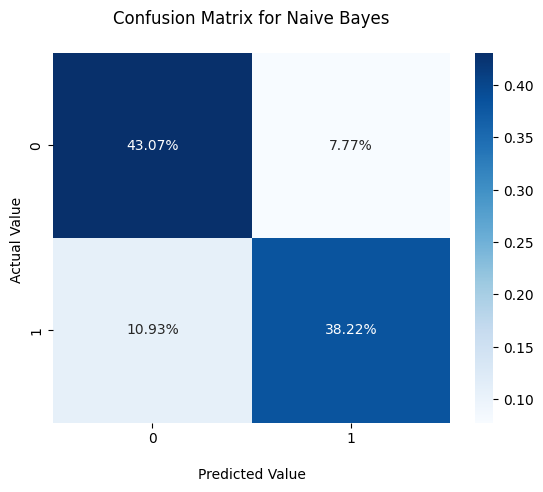

In [77]:
y_pred = gaussian.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Naive Bayes\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      9174
           1       0.83      0.78      0.80      8869

    accuracy                           0.81     18043
   macro avg       0.81      0.81      0.81     18043
weighted avg       0.81      0.81      0.81     18043



In [79]:
# D-Tree

In [80]:
DT_clf = DecisionTreeClassifier(max_depth=3)
DT_clf.fit(X_train,y_train)
y_pred = DT_clf.predict(X_test)
print("Accuracy:" , metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.8214820151859447


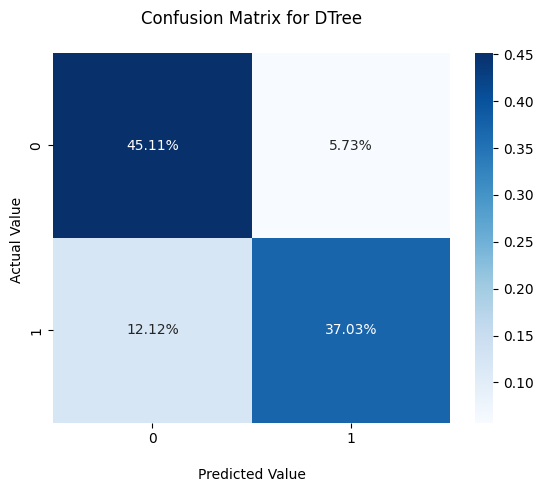

              precision    recall  f1-score   support

           0       0.79      0.89      0.83      9174
           1       0.87      0.75      0.81      8869

    accuracy                           0.82     18043
   macro avg       0.83      0.82      0.82     18043
weighted avg       0.83      0.82      0.82     18043



In [81]:
y_pred = DT_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for DTree\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, y_pred))

In [82]:
# Random-forest

In [83]:
random_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid={'n_estimators': [100, 300]}, cv=5).fit(X_train, y_train)
random_forest.fit(X_train,y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest,random_forest.best_params_)

87.37 {'n_estimators': 100}


In [71]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(random_forest, open(filename, 'wb'))

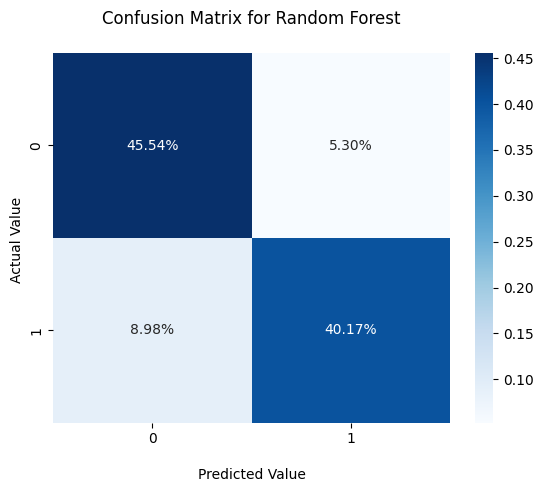

              precision    recall  f1-score   support

           0       0.84      0.90      0.86      9174
           1       0.88      0.82      0.85      8869

    accuracy                           0.86     18043
   macro avg       0.86      0.86      0.86     18043
weighted avg       0.86      0.86      0.86     18043



In [84]:
y_pred = random_forest.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Random Forest\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, y_pred))

In [87]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

81.59

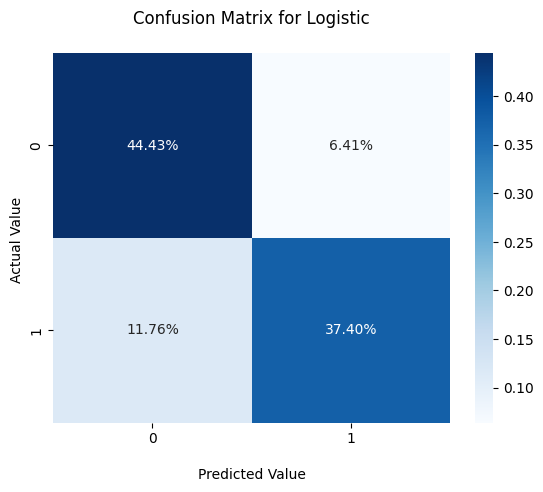

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      9174
           1       0.85      0.76      0.80      8869

    accuracy                           0.82     18043
   macro avg       0.82      0.82      0.82     18043
weighted avg       0.82      0.82      0.82     18043



In [88]:
y_pred = logreg.predict(X_test)
cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic\n');
ax.set_xlabel('\nPredicted Value')
ax.set_ylabel('Actual Value ');

## Display the visualization of the Confusion Matrix.
plt.show()

print(classification_report(y_test, y_pred))

# ANN

In [89]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [90]:
X_train

,Cluster,Cluster,gender,age_bin,BMI_Class,MAP_Class,cholesterol,gluc,smoke,active
46687,0,0,0,3,4,2,0,0,0,0
5503,1,1,1,2,2,2,1,1,1,1
23757,2,2,0,5,3,2,1,0,0,1
37872,1,1,0,6,2,4,2,2,0,0
38459,0,0,0,4,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
50057,0,0,0,5,2,1,1,1,0,0
32511,0,0,0,4,1,2,0,0,0,1
5192,0,0,1,6,1,2,0,0,0,1
12172,0,0,1,5,2,2,0,0,0,1


In [91]:
y_train

46687    0
5503     1
23757    0
37872    1
38459    0
        ..
50057    0
32511    0
5192     0
12172    0
33003    0
Name: cardio, Length: 42099, dtype: int64

In [94]:
ANN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)),
    # Hidden Layers
    tf.keras.layers.Dense(units=30, activation='relu'),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=40, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=40, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=30, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')  # Binary classification, so 1 unit with sigmoid activation
])

# Use binary_crossentropy for binary classification
ANN.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = ANN.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=50)

Epoch 1/50
842/842 [==============================] - 5s 4ms/step - loss: 0.5009 - accuracy: 0.7771 - val_loss: 0.4381 - val_accuracy: 0.8246
Epoch 2/50
842/842 [==============================] - 4s 4ms/step - loss: 0.4456 - accuracy: 0.8207 - val_loss: 0.4262 - val_accuracy: 0.8284
Epoch 3/50
842/842 [==============================] - 4s 5ms/step - loss: 0.4281 - accuracy: 0.8266 - val_loss: 0.4076 - val_accuracy: 0.8298
Epoch 4/50
842/842 [==============================] - 4s 5ms/step - loss: 0.4163 - accuracy: 0.8279 - val_loss: 0.4155 - val_accuracy: 0.8287
Epoch 5/50
842/842 [==============================] - 4s 5ms/step - loss: 0.4106 - accuracy: 0.8296 - val_loss: 0.4012 - val_accuracy: 0.8272
Epoch 6/50
842/842 [==============================] - 4s 5ms/step - loss: 0.4016 - accuracy: 0.8307 - val_loss: 0.3850 - val_accuracy: 0.8358
Epoch 7/50
842/842 [==============================] - 4s 5ms/step - loss: 0.3955 - accuracy: 0.8331 - val_loss: 0.3816 - val_accuracy: 0.8355
Epoch 

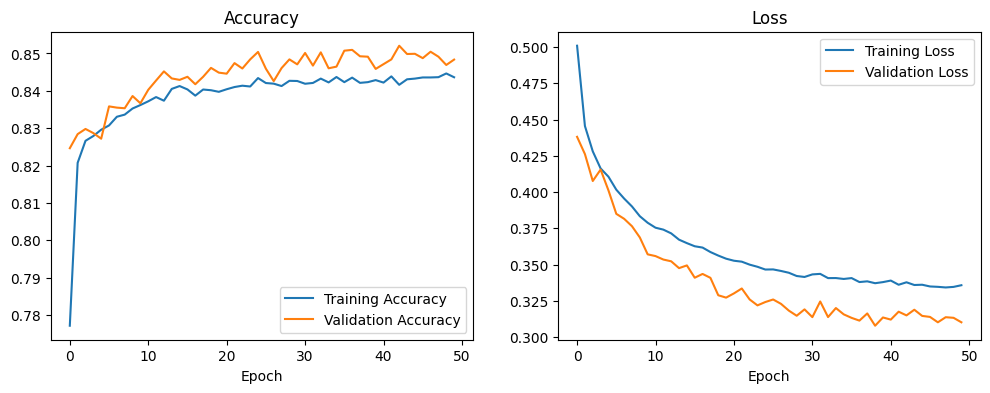

In [95]:
import matplotlib.pyplot as plt

# Access training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [96]:
y_pred = np.round(ANN.predict(X_test))

# Convert predictions to binary values (0 or 1)
y_pred = y_pred.astype(int)

# Print the classification report
print(classification_report(y_test, y_pred))

564/564 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      9174
           1       0.88      0.80      0.84      8869

    accuracy                           0.85     18043
   macro avg       0.85      0.85      0.85     18043
weighted avg       0.85      0.85      0.85     18043



In [ ]:
# import optuna

# # Define an objective function for Optuna
# def objective(trial):
#     # Define the search space for hyperparameters
#     num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 5)
#     dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
#     learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

#     # Build and compile the model using the suggested hyperparameters
#     model = build_and_compile_model(num_hidden_layers, dropout_rate, learning_rate)

#     # Train the model
#     history = model.fit(X_train, y_train, epochs=20, batch_size=50, verbose=0)

#     # Evaluate the model on the validation data
#     val_loss = model.evaluate(X_val, y_val, verbose=0)[0]

#     return val_loss  # Optuna will minimize this value

# # Define the model building and compiling function
# def build_and_compile_model(num_hidden_layers, dropout_rate, learning_rate):
#     model = tf.keras.models.Sequential()
#     model.add(tf.keras.layers.Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],))

#     for _ in range(num_hidden_layers):   
#         model.add(tf.keras.layers.Dense(units=30, activation='relu'))
#         model.add(tf.keras.layers.Dropout(dropout_rate))

#     model.add(tf.keras.layers.Dense(units=1, activation='sigmoid')

#     model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

#     return model

# # Create an Optuna study and optimize
# study = optuna.create_study(direction='minimize')  # We want to minimize the validation loss
# study.optimize(objective, n_trials=100)  # You can adjust the number of trials

# # Get the best hyperparameters
# best_params = study.best_params

# # Train the final model with the best hyperparameters
# best_model = build_and_compile_model(best_params['num_hidden_layers'], best_params['dropout_rate'], best_params['learning_rate'])
# history = best_model.fit(X_train, y_train, epochs=20, batch_size=50, validation_data=(X_val, y_val))


In [ ]:
import optuna
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, recall_score

# Define the objective function
def objective(trial):
    cnn_params = {
        'dense1': trial.suggest_int('dense1', 100, 600),
        'dense2': trial.suggest_int('dense2', 100, 600),
        'dense3': trial.suggest_int('dense3', 100, 600),
        'dense4': trial.suggest_int('dense4', 100, 600),
        'dense5': trial.suggest_int('dense5', 100, 600),
        'drop1': trial.suggest_float('drop1', 0.2, 0.9),
        'drop2': trial.suggest_float('drop2', 0.2, 0.9),
        'drop3': trial.suggest_float('drop3', 0.2, 0.9),
        'drop4': trial.suggest_float('drop4', 0.2, 0.9),
        'drop5': trial.suggest_float('drop5', 0.2, 0.9),
        'epochs': trial.suggest_int('epochs', 10, 50)
    }
    
    model_network = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=X.shape[1], activation='relu', input_shape=(X.shape[1],)),
        # Hidden Layers
        tf.keras.layers.Dense(units=cnn_params['dense1'], activation='relu'),
        tf.keras.layers.Dropout(rate=cnn_params['drop1']),
        tf.keras.layers.Dense(units=cnn_params['dense2'], activation='relu'),
        tf.keras.layers.Dropout(cnn_params['drop2']),
        tf.keras.layers.Dense(units=cnn_params['dense3'], activation='relu'),
        tf.keras.layers.Dropout(cnn_params['drop3']),
        tf.keras.layers.Dense(units=cnn_params['dense4'], activation='relu'),
        tf.keras.layers.Dropout(cnn_params['drop4']),
        tf.keras.layers.Dense(units=cnn_params['dense5'], activation='relu'),
        tf.keras.layers.Dropout(cnn_params['drop5']),
        # Output Layer
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])
    
    model_network.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    batch_size = 256
    E = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    R = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
    steps_per_epoch = round(X_train.shape[0] / batch_size)
    
    history = model_network.fit(
        X_train,
        y_train,
        steps_per_epoch=steps_per_epoch,
        epochs=cnn_params['epochs'],
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        callbacks=[E, R],
        verbose=0
    )
    
    y_preds = model_network.predict(X_test)
    y_pred = (y_preds > 0.5).astype(int)
    y_true = y_test.values
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    
    # Return accuracy for optimization
    accuracy = (y_pred == y_true).mean()
    return accuracy

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')  # Optimize for accuracy
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI_Class', hue='cardio', data=df, palette='viridis')
plt.title('BMI Class vs Cardiovascular Disease')
plt.xlabel('BMI Class')
plt.ylabel('Count')
plt.legend(title='Cardio', loc='upper right')
plt.xticks(rotation=45)
plt.show()
